# Build a predictive model to estimate the likelihood of customer churn for a telecommunication company. The model should consider factors such as customer demographics, usage patterns, billing history, and customer service interactions

In [170]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import requests 
import re
import seaborn as sns

In [59]:
url =r"C:\Users\Rahul Sunchu\Downloads\WA_Fn-UseC_-Telco-Customer-Churn.csv"

In [60]:
url

'C:\\Users\\Rahul Sunchu\\Downloads\\WA_Fn-UseC_-Telco-Customer-Churn.csv'

In [61]:
df = pd.read_csv(url)

In [62]:
# Display the first few rows of the dataframe

df.head()

customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  7590-VHVEG  Female              0     Yes         No       1           No   
1  5575-GNVDE    Male              0      No         No      34          Yes   
2  3668-QPYBK    Male              0      No         No       2          Yes   
3  7795-CFOCW    Male              0      No         No      45           No   
4  9237-HQITU  Female              0      No         No       2          Yes   

      MultipleLines InternetService OnlineSecurity  ... DeviceProtection  \
0  No phone service             DSL             No  ...               No   
1                No             DSL            Yes  ...              Yes   
2                No             DSL            Yes  ...               No   
3  No phone service             DSL            Yes  ...              Yes   
4                No     Fiber optic             No  ...               No   

  TechSupport StreamingTV StreamingMovies        Contract PaperlessBilling  \
0          No          No              No  Month-to-month              Yes   
1          No          No              No        One year               No   
2          No          No              No  Month-to-month              Yes   
3         Yes          No              No        One year               No   
4          No          No              No  Month-to-month              Yes   

               PaymentMethod MonthlyCharges  TotalCharges Churn  
0           Electronic check          29.85         29.85    No  
1               Mailed check          56.95        1889.5    No  
2               Mailed check          53.85        108.15   Yes  
3  Bank transfer (automatic)          42.30       1840.75    No  
4           Electronic check          70.70        151.65   Yes  

[5 rows x 21 columns]

In [63]:
# Display the last few rows of the dataframe

df.tail()

customerID  gender  SeniorCitizen Partner Dependents  tenure  \
7038  6840-RESVB    Male              0     Yes        Yes      24   
7039  2234-XADUH  Female              0     Yes        Yes      72   
7040  4801-JZAZL  Female              0     Yes        Yes      11   
7041  8361-LTMKD    Male              1     Yes         No       4   
7042  3186-AJIEK    Male              0      No         No      66   

     PhoneService     MultipleLines InternetService OnlineSecurity  ...  \
7038          Yes               Yes             DSL            Yes  ...   
7039          Yes               Yes     Fiber optic             No  ...   
7040           No  No phone service             DSL            Yes  ...   
7041          Yes               Yes     Fiber optic             No  ...   
7042          Yes                No     Fiber optic            Yes  ...   

     DeviceProtection TechSupport StreamingTV StreamingMovies        Contract  \
7038              Yes         Yes         Yes             Yes        One year   
7039              Yes          No         Yes             Yes        One year   
7040               No          No          No              No  Month-to-month   
7041               No          No          No              No  Month-to-month   
7042              Yes         Yes         Yes             Yes        Two year   

     PaperlessBilling              PaymentMethod MonthlyCharges  TotalCharges  \
7038              Yes               Mailed check          84.80        1990.5   
7039              Yes    Credit card (automatic)         103.20        7362.9   
7040              Yes           Electronic check          29.60        346.45   
7041              Yes               Mailed check          74.40         306.6   
7042              Yes  Bank transfer (automatic)         105.65        6844.5   

     Churn  
7038    No  
7039    No  
7040    No  
7041   Yes  
7042    No  

[5 rows x 21 columns]

In [64]:
# decribes about the dataset

df.describe()

SeniorCitizen       tenure  MonthlyCharges
count    7043.000000  7043.000000     7043.000000
mean        0.162147    32.371149       64.761692
std         0.368612    24.559481       30.090047
min         0.000000     0.000000       18.250000
25%         0.000000     9.000000       35.500000
50%         0.000000    29.000000       70.350000
75%         0.000000    55.000000       89.850000
max         1.000000    72.000000      118.750000

In [65]:
# Provide information about dataset

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [66]:
# Checking for missing values

df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [67]:
# Replace missing values (if any)

df.fillna(method='ffill', inplace=True)

In [68]:
# Encode categorical variables

df['gender'] = df['gender'].map({'Female': 0, 'Male': 1})
df['Partner'] = df['Partner'].map({'No': 0, 'Yes': 1})
df['Dependents'] = df['Dependents'].map({'No': 0, 'Yes': 1})
df['PhoneService'] = df['PhoneService'].map({'No': 0, 'Yes': 1})
df['MultipleLines'] = df['MultipleLines'].map({'No phone service': 0, 'No': 1, 'Yes': 2})
df['InternetService'] = df['InternetService'].map({'DSL': 0, 'Fiber optic': 1, 'No': 2})
df['OnlineSecurity'] = df['OnlineSecurity'].map({'No internet service': 0, 'No': 1, 'Yes': 2})
df['OnlineBackup'] = df['OnlineBackup'].map({'No internet service': 0, 'No': 1, 'Yes': 2})
df['DeviceProtection'] = df['DeviceProtection'].map({'No internet service': 0, 'No': 1, 'Yes': 2})
df['TechSupport'] = df['TechSupport'].map({'No internet service': 0, 'No': 1, 'Yes': 2})
df['StreamingTV'] = df['StreamingTV'].map({'No internet service': 0, 'No': 1, 'Yes': 2})
df['StreamingMovies'] = df['StreamingMovies'].map({'No internet service': 0, 'No': 1, 'Yes': 2})
df['Contract'] = df['Contract'].map({'Month-to-month': 0, 'One year': 1, 'Two year': 2})
df['PaperlessBilling'] = df['PaperlessBilling'].map({'No': 0, 'Yes': 1})
df['PaymentMethod'] = df['PaymentMethod'].map({'Electronic check': 0, 'Mailed check': 1, 'Bank transfer (automatic)': 2, 'Credit card (automatic)': 3})
df['Churn'] = df['Churn'].map({'No': 0, 'Yes': 1})

In [69]:
# Convert TotalCharges to numeric, coercing errors to NaN and then filling them
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')
df['TotalCharges'].fillna(df['TotalCharges'].mean(), inplace=True)

# Analysis of Univeriate, Biveriate, Multiveriate

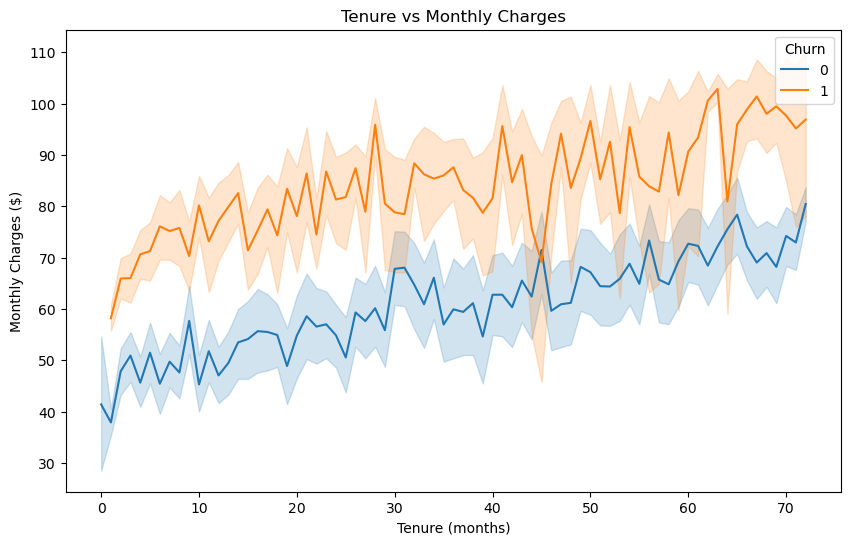

In [156]:
# Line plot: Tenure vs Monthly Charges colored by Churn

plt.figure(figsize=(10, 6))
sns.lineplot(x='tenure', y='MonthlyCharges', hue='Churn', data=df)
plt.title('Tenure vs Monthly Charges')
plt.xlabel('Tenure (months)')
plt.ylabel('Monthly Charges ($)')
plt.legend(title='Churn')
plt.show()

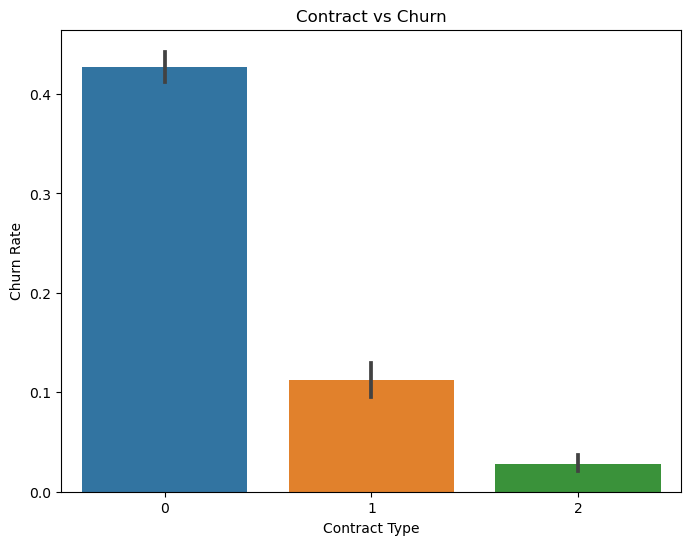

In [157]:
# Bar plot: Contract vs Churn

plt.figure(figsize=(8, 6))
sns.barplot(x='Contract', y='Churn', data=df)
plt.title('Contract vs Churn')
plt.xlabel('Contract Type')
plt.ylabel('Churn Rate')
plt.show()


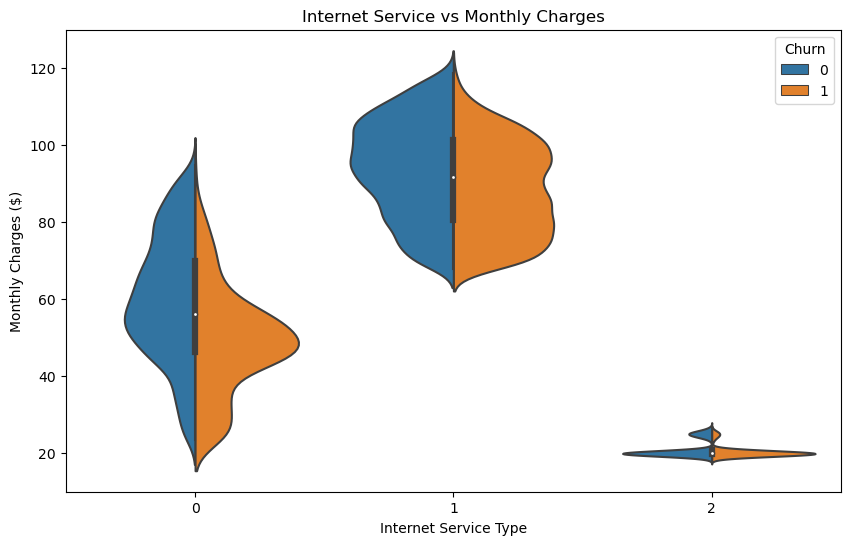

In [158]:
# Violin plot: Internet Service vs Monthly Charges colored by Churn

plt.figure(figsize=(10, 6))
sns.violinplot(x='InternetService', y='MonthlyCharges', hue='Churn', data=df, split=True)
plt.title('Internet Service vs Monthly Charges')
plt.xlabel('Internet Service Type')
plt.ylabel('Monthly Charges ($)')
plt.legend(title='Churn')
plt.show()

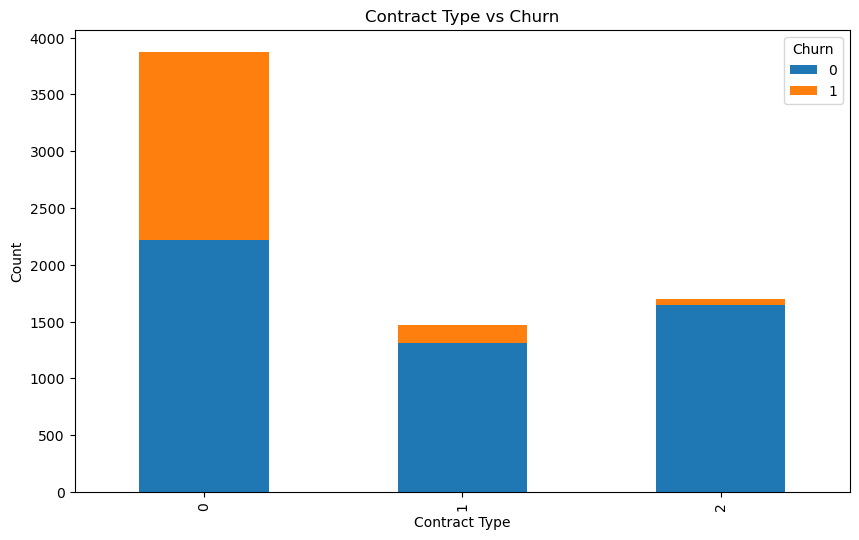

In [165]:
# Stacked bar plot: Contract type vs Churn

contract_churn = pd.crosstab(df['Contract'], df['Churn'])
contract_churn.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title('Contract Type vs Churn')
plt.xlabel('Contract Type')
plt.ylabel('Count')
plt.legend(title='Churn')
plt.show()

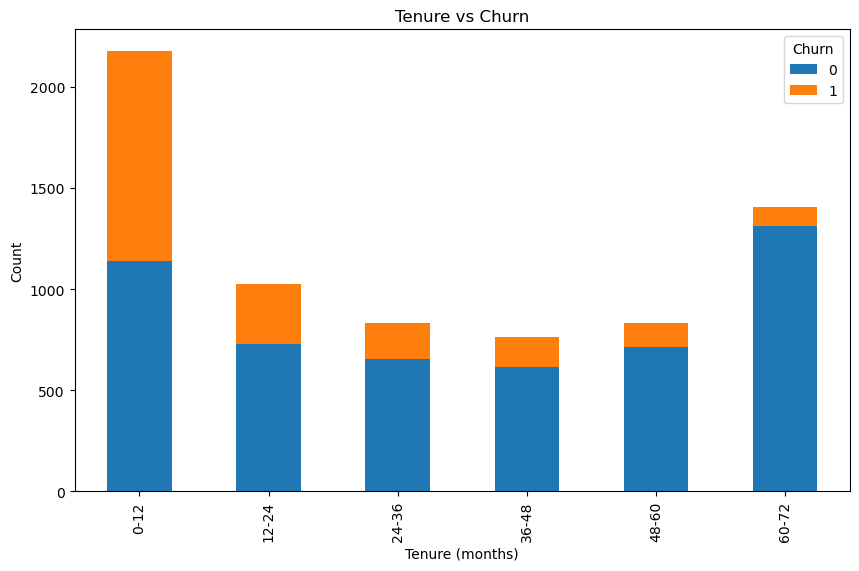

In [167]:
# Stacked bar plot: Tenure vs Churn
df['tenure_bins'] = pd.cut(df['tenure'], bins=[0, 12, 24, 36, 48, 60, 72], labels=['0-12', '12-24', '24-36', '36-48', '48-60', '60-72'])
tenure_churn = pd.crosstab(df['tenure_bins'], df['Churn'])
tenure_churn.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title('Tenure vs Churn')
plt.xlabel('Tenure (months)')
plt.ylabel('Count')
plt.legend(title='Churn')
plt.show()

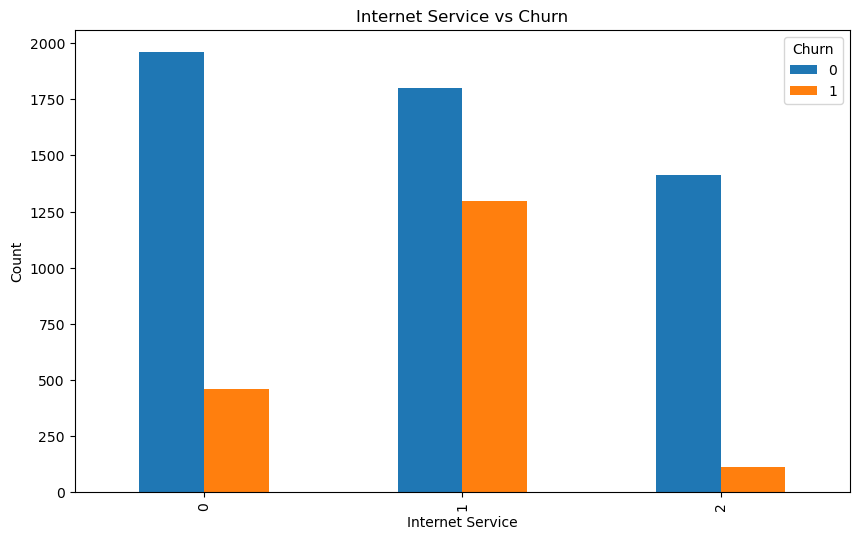

In [166]:
# Grouped bar plot: Internet service vs Churn
internet_churn = pd.crosstab(df['InternetService'], df['Churn'])
internet_churn.plot(kind='bar', figsize=(10, 6))
plt.title('Internet Service vs Churn')
plt.xlabel('Internet Service')
plt.ylabel('Count')
plt.legend(title='Churn')
plt.show()

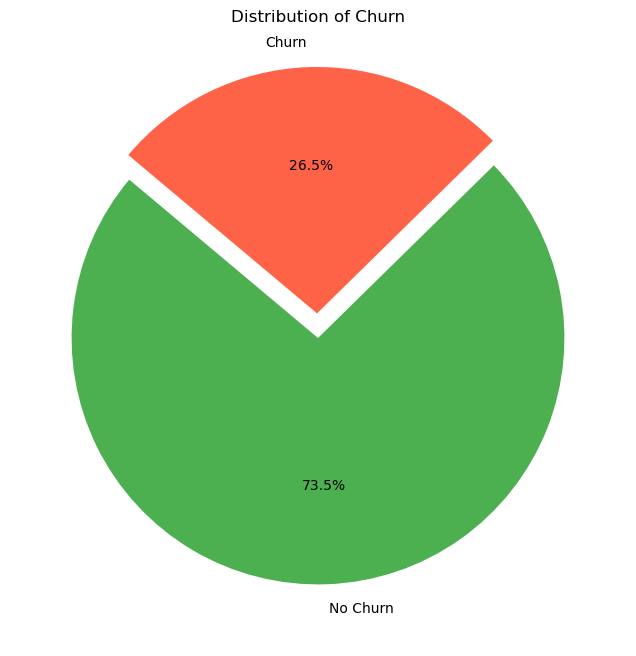

In [111]:
# Pie plot: Distribution of Churn

churn_counts = df['Churn'].value_counts()
labels = ['No Churn', 'Churn']
colors = ['#4CAF50', '#FF6347']

plt.figure(figsize=(8, 8))
plt.pie(churn_counts, labels=labels, autopct='%1.1f%%', startangle=140, colors=colors, explode=[0, 0.1])
plt.title('Distribution of Churn')
plt.show()


In [55]:
#plot distribution of gender
x=df["gender"].value_counts()

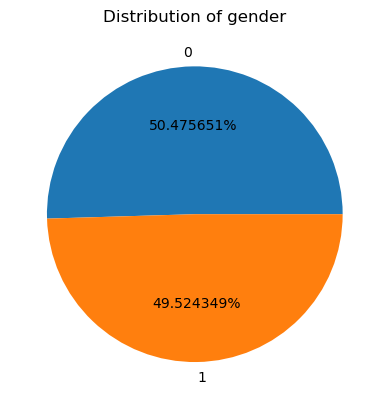

In [83]:
plt.pie(df["gender"].value_counts(),autopct="%2f%%",labels=df["gender"].unique())
plt.title('Distribution of gender')
plt.show()

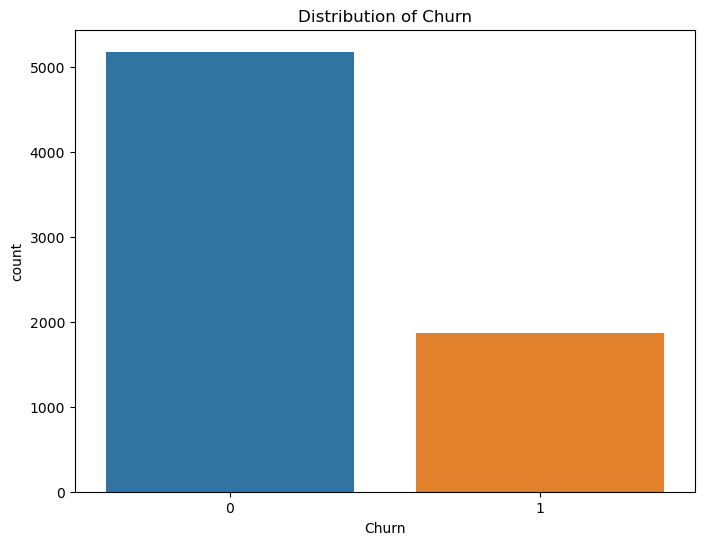

In [99]:
# Plot: Distribution of Churn

plt.figure(figsize=(8, 6))
sns.countplot(x='Churn', data=df)
plt.title('Distribution of Churn')
plt.show()

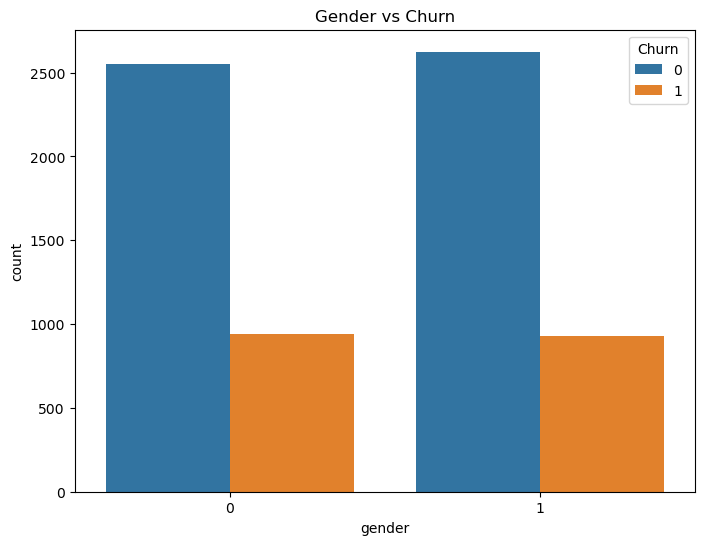

In [100]:
# Plot: Gender vs Churn

plt.figure(figsize=(8, 6))
sns.countplot(x='gender', hue='Churn', data=df)
plt.title('Gender vs Churn')
plt.show()

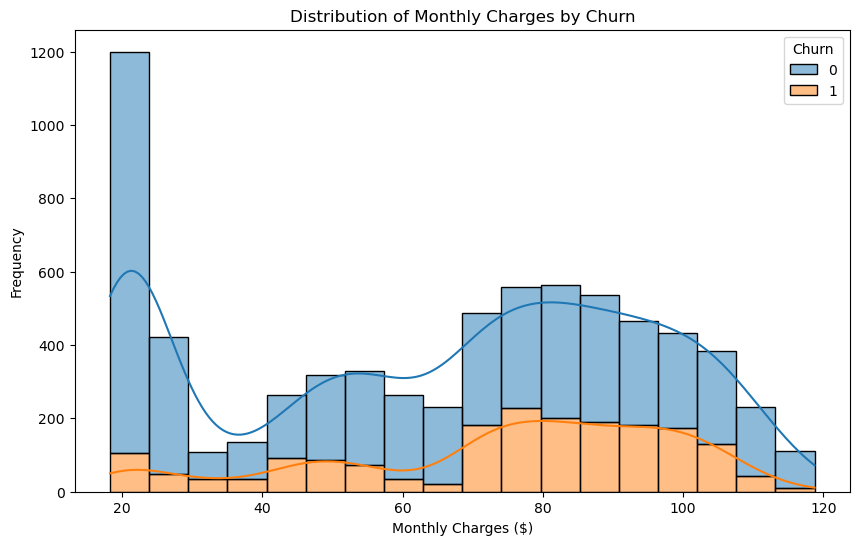

In [114]:
# Histogram plot: Distribution of Monthly Charges

plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='MonthlyCharges', hue='Churn', multiple='stack', kde=True)
plt.title('Distribution of Monthly Charges by Churn')
plt.xlabel('Monthly Charges ($)')
plt.ylabel('Frequency')
plt.show()

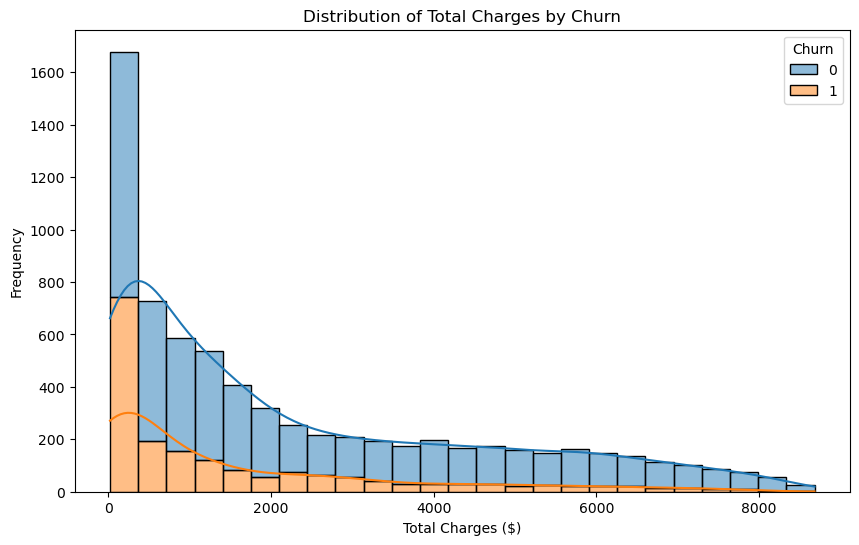

In [115]:
# Histogram plot: Distribution of Total Charges

plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='TotalCharges', hue='Churn', multiple='stack', kde=True)
plt.title('Distribution of Total Charges by Churn')
plt.xlabel('Total Charges ($)')
plt.ylabel('Frequency')
plt.show()

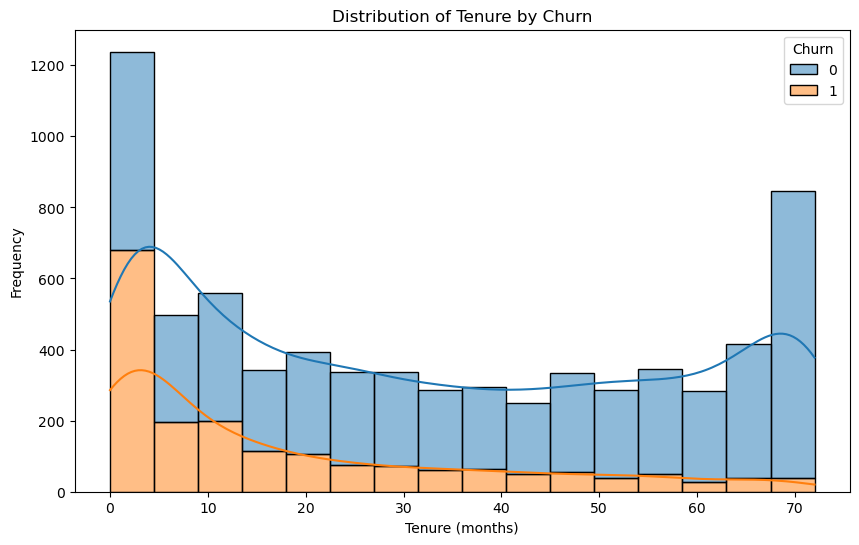

In [116]:
# Histogram plot: Distribution of Tenure

plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='tenure', hue='Churn', multiple='stack', kde=True)
plt.title('Distribution of Tenure by Churn')
plt.xlabel('Tenure (months)')
plt.ylabel('Frequency')
plt.show()

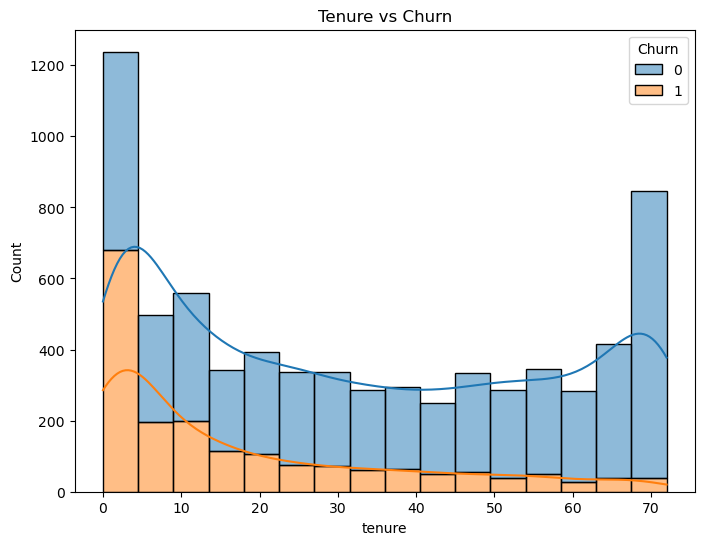

In [101]:
# Plot: Tenure vs Churn

plt.figure(figsize=(8, 6))
sns.histplot(data=df, x='tenure', hue='Churn', multiple='stack', kde=True)
plt.title('Tenure vs Churn')
plt.show()

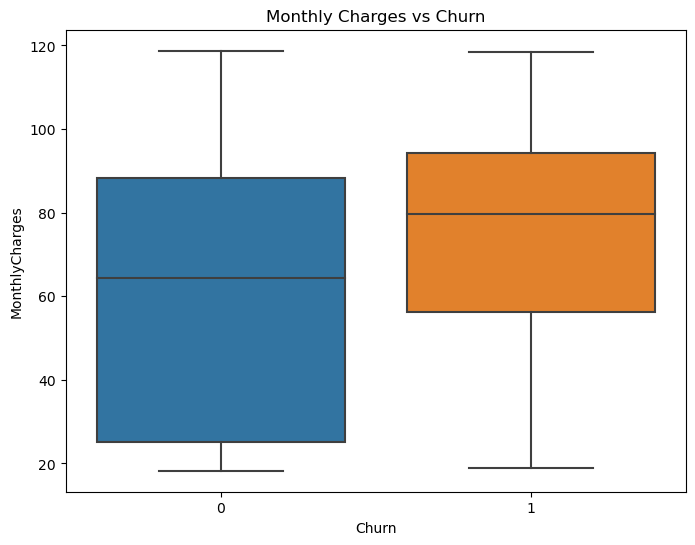

In [102]:
# Plot: Monthly Charges vs Churn

plt.figure(figsize=(8, 6))
sns.boxplot(x='Churn', y='MonthlyCharges', data=df)
plt.title('Monthly Charges vs Churn')
plt.show()

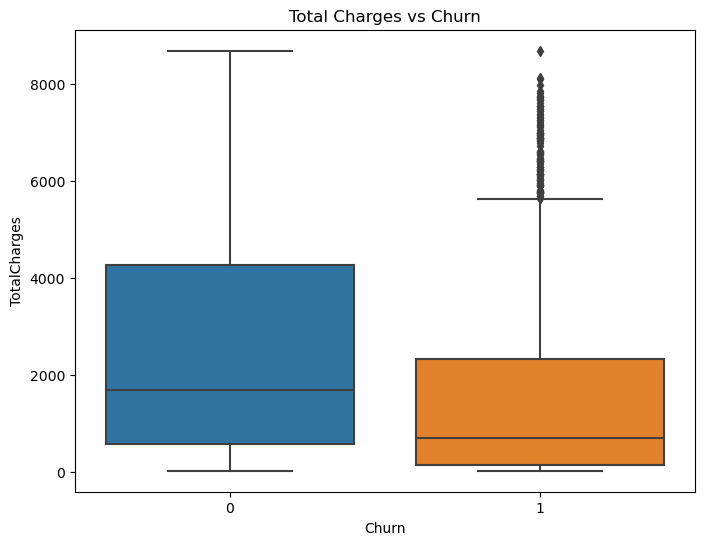

In [103]:
# Plot: Total Charges vs Churn

plt.figure(figsize=(8, 6))
sns.boxplot(x='Churn', y='TotalCharges', data=df)
plt.title('Total Charges vs Churn')
plt.show()

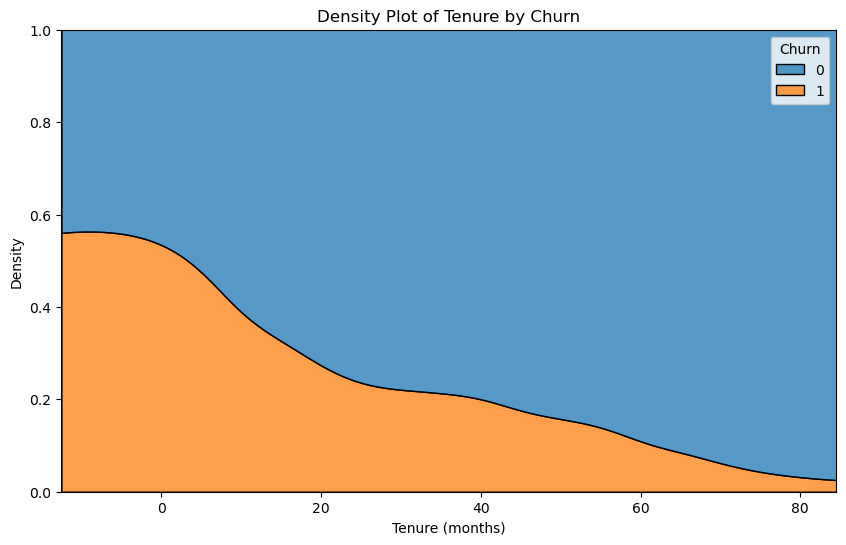

In [164]:
# Density plot: Tenure

plt.figure(figsize=(10, 6))
sns.kdeplot(data=df, x='tenure', hue='Churn', multiple='fill')
plt.title('Density Plot of Tenure by Churn')
plt.xlabel('Tenure (months)')
plt.ylabel('Density')
plt.show()

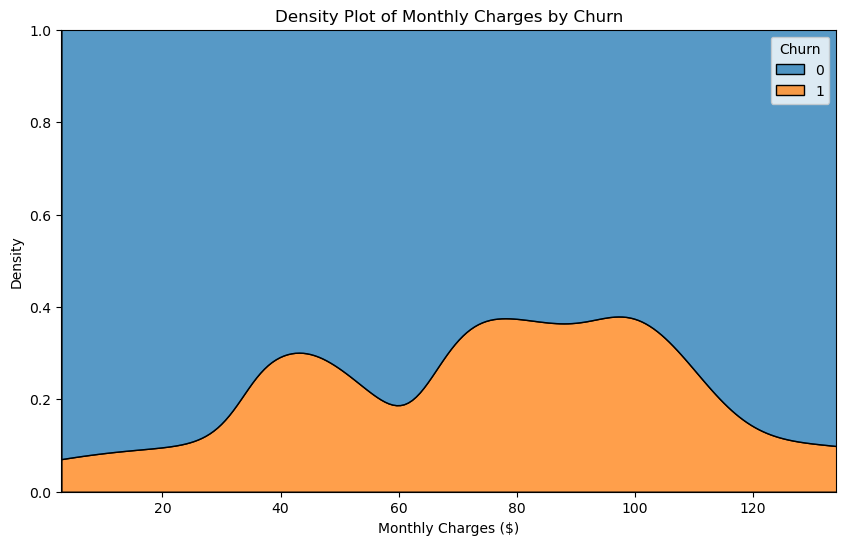

In [161]:
# Density plot: Monthly Charges

plt.figure(figsize=(10, 6))
sns.kdeplot(data=df, x='MonthlyCharges', hue='Churn', multiple='fill')
plt.title('Density Plot of Monthly Charges by Churn')
plt.xlabel('Monthly Charges ($)')
plt.ylabel('Density')
plt.show()

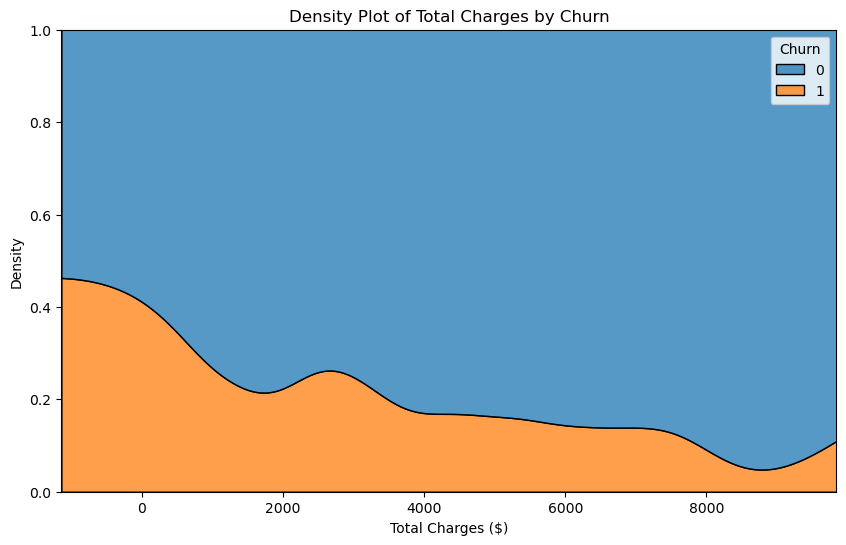

In [162]:
# Density plot: Total Charges

plt.figure(figsize=(10, 6))
sns.kdeplot(data=df, x='TotalCharges', hue='Churn', multiple='fill')
plt.title('Density Plot of Total Charges by Churn')
plt.xlabel('Total Charges ($)')
plt.ylabel('Density')
plt.show()

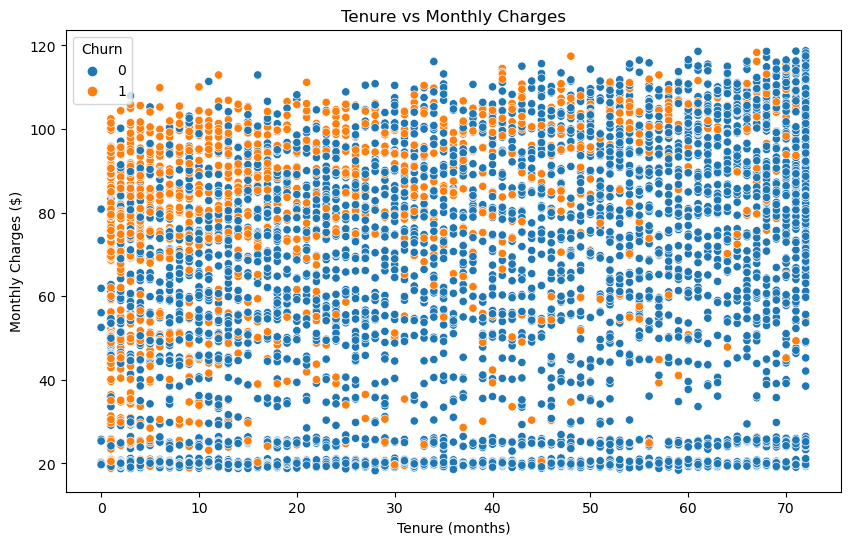

In [163]:
# Scatter plot: Tenure vs Monthly Charges colored by Churn

plt.figure(figsize=(10, 6))
sns.scatterplot(x='tenure', y='MonthlyCharges', hue='Churn', data=df)
plt.title('Tenure vs Monthly Charges')
plt.xlabel('Tenure (months)')
plt.ylabel('Monthly Charges ($)')
plt.legend(title='Churn')
plt.show()

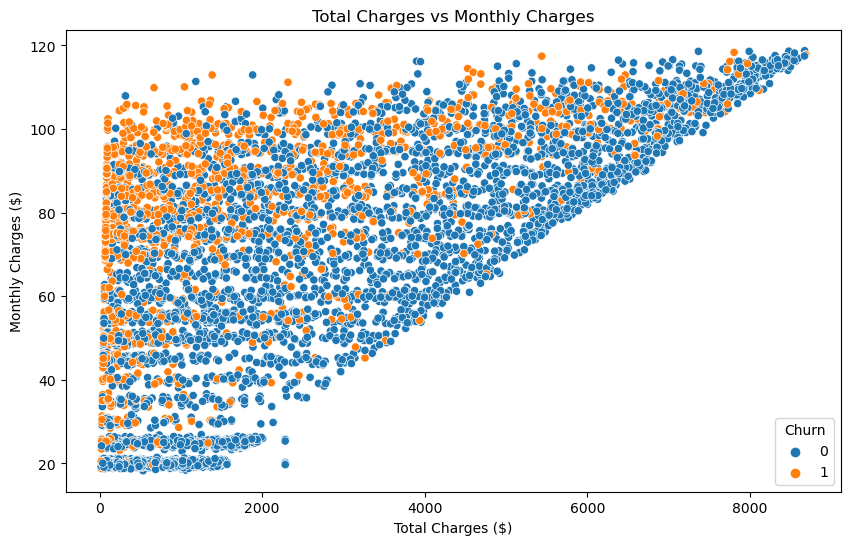

In [106]:
# Scatter plot: Total Charges vs Monthly Charges colored by Churn

plt.figure(figsize=(10, 6))
sns.scatterplot(x='TotalCharges', y='MonthlyCharges', hue='Churn', data=df)
plt.title('Total Charges vs Monthly Charges')
plt.xlabel('Total Charges ($)')
plt.ylabel('Monthly Charges ($)')
plt.legend(title='Churn')
plt.show()

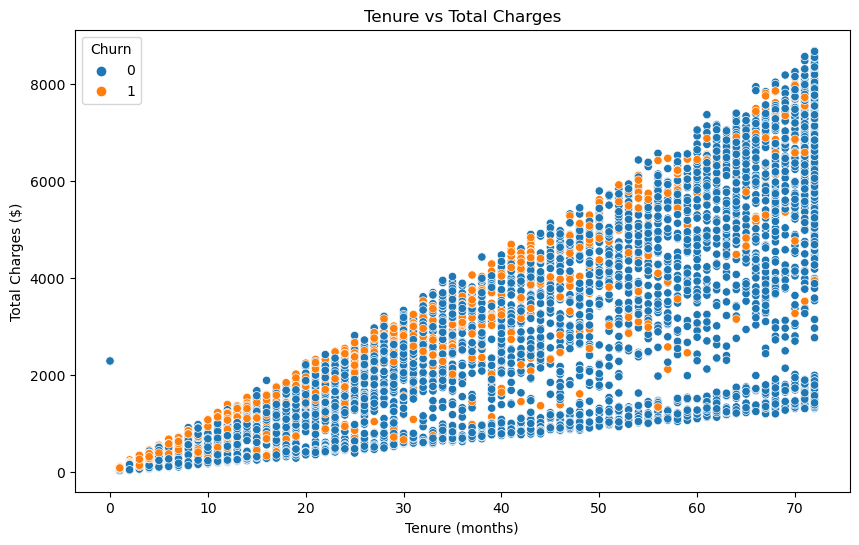

In [145]:
# Scatter plot: Tenure vs Total Charges colored by Churn

plt.figure(figsize=(10, 6))
sns.scatterplot(x='tenure', y='TotalCharges', hue='Churn', data=df)
plt.title('Tenure vs Total Charges')
plt.xlabel('Tenure (months)')
plt.ylabel('Total Charges ($)')
plt.legend(title='Churn')
plt.show()

C:\Users\Rahul Sunchu\AppData\Local\Temp\ipykernel_32060\4009304709.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True, fmt=".2f", cmap='coolwarm')


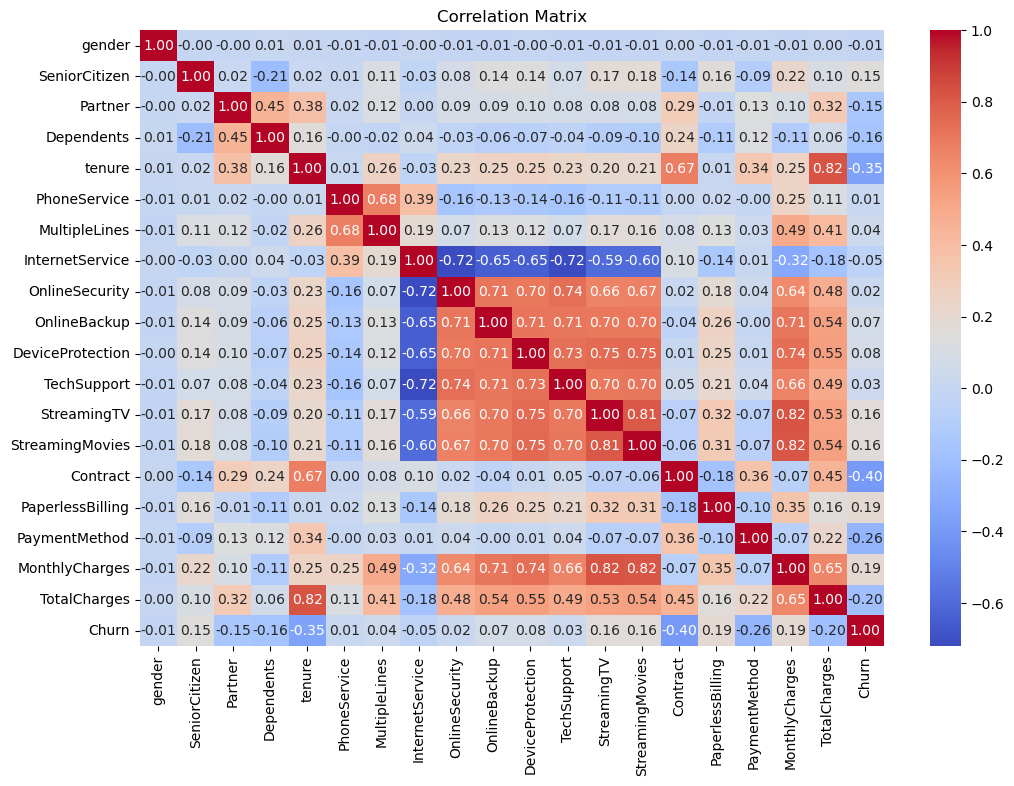

In [104]:
# Plot: Correlation Heatmap

plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

C:\Users\Rahul Sunchu\AppData\Local\Temp\ipykernel_32060\1720830432.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True, fmt=".2f")


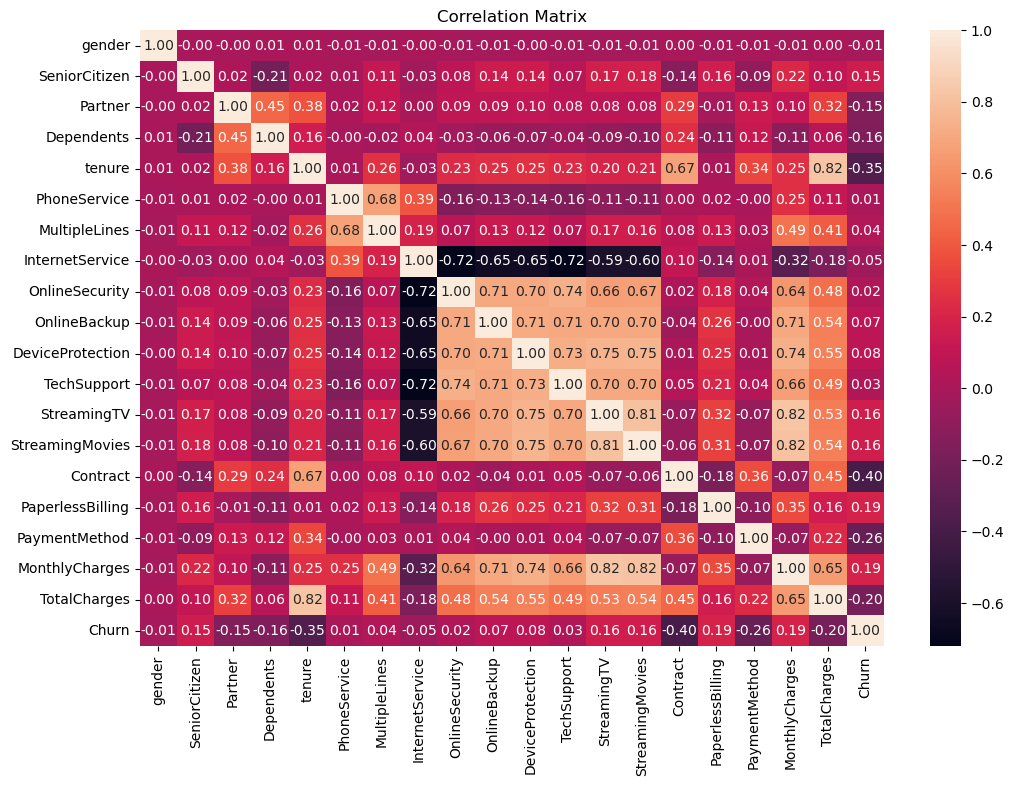

In [31]:
# Plot correlations between features

plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True, fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

In [146]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import classification_report, roc_auc_score

In [147]:
X = pd.get_dummies(df.drop('Churn', axis=1))
y = df['Churn']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


models = {
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'Gradient Boosting': GradientBoostingClassifier()
}


for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    y_proba = model.predict_proba(X_test)[:, 1]
    print(f"Model: {name}")
    print(classification_report(y_test, y_pred))
    print(f"ROC-AUC: {roc_auc_score(y_test, y_proba):.2f}")
    print('-' * 50)


Model: Logistic Regression
              precision    recall  f1-score   support

           0       0.76      0.99      0.86      1036
           1       0.80      0.13      0.22       373

    accuracy                           0.76      1409
   macro avg       0.78      0.56      0.54      1409
weighted avg       0.77      0.76      0.69      1409

ROC-AUC: 0.85
--------------------------------------------------
Model: Decision Tree
              precision    recall  f1-score   support

           0       0.83      0.87      0.85      1036
           1       0.59      0.50      0.54       373

    accuracy                           0.78      1409
   macro avg       0.71      0.69      0.70      1409
weighted avg       0.77      0.78      0.77      1409

ROC-AUC: 0.69
--------------------------------------------------
Model: Random Forest
              precision    recall  f1-score   support

           0       0.83      0.92      0.87      1036
           1       0.69      0.48     

In [168]:
# Evaluate the model

print(classification_report(y_test, y_pred))
print(f"ROC-AUC: {roc_auc_score(y_test, y_proba):.2f}")


              precision    recall  f1-score   support

           0       0.84      0.92      0.88      1036
           1       0.69      0.51      0.59       373

    accuracy                           0.81      1409
   macro avg       0.76      0.71      0.73      1409
weighted avg       0.80      0.81      0.80      1409

ROC-AUC: 0.86


In [148]:
pip install shap


Note: you may need to restart the kernel to use updated packages.


In [154]:
import shap

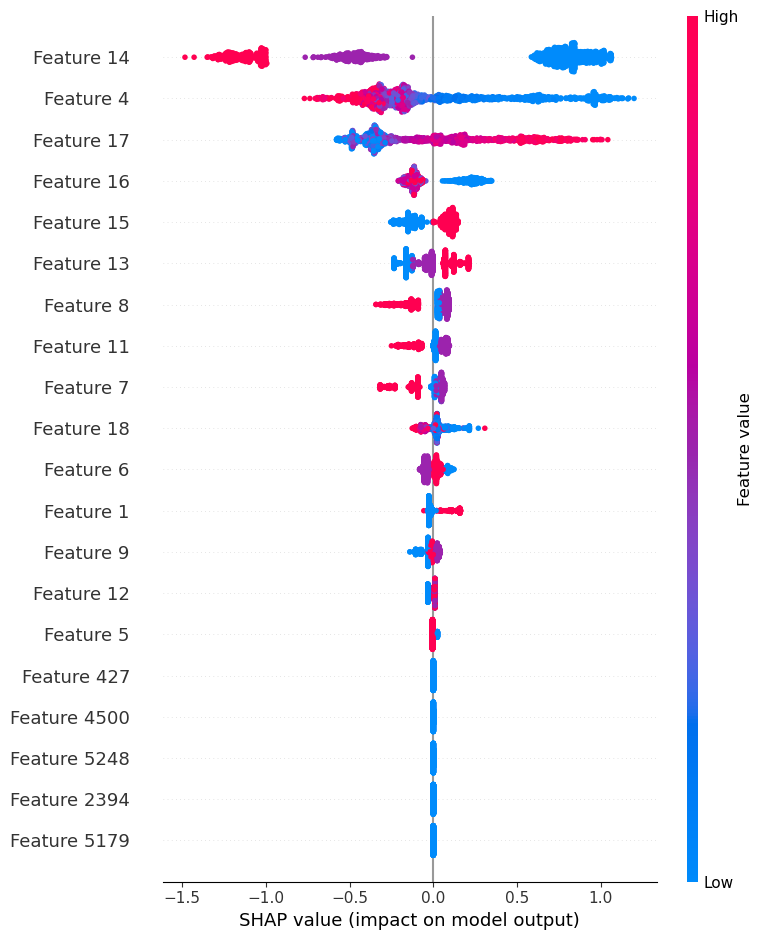

In [155]:
best_model = models['Gradient Boosting']
explainer = shap.Explainer(best_model)
shap_values = explainer.shap_values(X_test)
shap.summary_plot(shap_values, X_test)


In [151]:
import joblib

In [152]:
joblib.dump(best_model, 'churn_prediction_model.pkl')


['churn_prediction_model.pkl']